## Libraries

In [ ]:
!pip install ultralytics

In [ ]:
!pip install roboflow

## Loading Data
```
From -> https://universe.roboflow.com/touatimed/fire-detection-l76pw/dataset/1
```



In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key='bOvgETxnik4W2HZiugeA')
project = rf.workspace("touatimed").project("fire-detection-l76pw")
version = project.version(1)
dataset = version.download("yolov9")

## Loading Model

In [4]:
import yaml

# Define the dataset configuration
data_config = {
    'names': ['fire'],           # Class label
    'nc': 1,                     # Number of classes
    'train': '/kaggle/working/Fire-detection-1/train',
    'val': '/kaggle/working/Fire-detection-1/valid',
    'test': '/kaggle/working/Fire-detection-1/test',
    'roboflow': {                # Roboflow project metadata
        'license': 'BY-NC-SA 4.0',
        'project': 'wildfire-smoke',
        'version': 1,
        'url': 'https://universe.roboflow.com/brad-dwyer/wildfire-smoke/dataset/1',
        'workspace': 'brad-dwyer'
    }
}

# Write the configuration to a YAML file
yaml_file_path = '/kaggle/working/Fire-detection-1/data.yaml'  # Adjust the path as necessary

with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(data_config, yaml_file, default_flow_style=False)

print(f"YAML file created at {yaml_file_path}")

YAML file created at /kaggle/working/Fire-detection-1/data.yaml


In [5]:
from ultralytics import YOLO

# Load the YOLO model (either a pre-trained or custom model)
model = YOLO("yolo11m.pt")  # You can also use "yolo11x.pt" for a larger model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 74.9MB/s]


In [6]:
'''
#!pip install GPUtil

import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()
'''

'\n#!pip install GPUtil\n\nimport torch\nfrom GPUtil import showUtilization as gpu_usage\nfrom numba import cuda\n\ndef free_gpu_cache():\n    print("Initial GPU Usage")\n    gpu_usage()                             \n\n    torch.cuda.empty_cache()\n\n    cuda.select_device(0)\n    cuda.close()\n    cuda.select_device(0)\n\n    print("GPU Usage after emptying the cache")\n    gpu_usage()\n\nfree_gpu_cache()\n'

In [6]:
# Now use the YAML file for model training
model.train(data=yaml_file_path,
            epochs=50, 
            batch=32, 
            fl_gamma=2.0,
            project='fire-sb6',
            imgsz=640,
            workers=8)

Ultralytics 8.3.5 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/working/Fire-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 4.58MB/s]
2024-10-05 10:03:40,786	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-05 10:03:41,631	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 20.7MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Fire-detection-1/train/labels... 1756 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1756/1756 [00:01<00:00, 1127.15it/s]

train: New cache created: /kaggle/working/Fire-detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/Fire-detection-1/valid/labels... 502 images, 0 backgrounds, 0 corrupt: 100%|██████████| 502/502 [00:00<00:00, 1162.27it/s]

val: New cache created: /kaggle/working/Fire-detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      8.71G      1.589      1.977      1.646         37        640: 100%|██████████| 110/110 [01:00<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.94it/s]

                   all        502        695     0.0529      0.109     0.0299       0.01



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      8.68G      1.798      1.898      1.802         29        640: 100%|██████████| 110/110 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.29it/s]

                   all        502        695    0.00896     0.0504    0.00328    0.00102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      8.68G      1.702      1.797       1.74         21        640: 100%|██████████| 110/110 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.19it/s]

                   all        502        695      0.217      0.291      0.173     0.0827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      8.68G      1.653      1.699      1.696         30        640: 100%|██████████| 110/110 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]

                   all        502        695      0.556      0.591      0.535      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      8.75G      1.582       1.57      1.618         27        640: 100%|██████████| 110/110 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]

                   all        502        695      0.621      0.508       0.57      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      8.67G      1.544      1.526      1.601         24        640: 100%|██████████| 110/110 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695      0.474      0.469      0.414      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      8.67G      1.484      1.488      1.561         22        640: 100%|██████████| 110/110 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695      0.755      0.712      0.773      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      8.67G      1.423      1.394      1.509         34        640: 100%|██████████| 110/110 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695      0.725      0.665      0.728      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      8.68G      1.403      1.327      1.496         19        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]

                   all        502        695      0.767      0.669      0.768      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      8.68G      1.356      1.283      1.468         29        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]

                   all        502        695       0.58      0.596      0.589      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      8.67G      1.338      1.263      1.456         21        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695      0.749      0.605      0.716      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      8.69G      1.305      1.224      1.434         28        640: 100%|██████████| 110/110 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695       0.75      0.712      0.787      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      8.68G      1.277      1.184      1.422         24        640: 100%|██████████| 110/110 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695      0.767      0.695      0.791      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      8.68G      1.225      1.135      1.378         28        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695      0.794      0.767      0.838      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25       8.7G      1.225      1.107      1.366         27        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695      0.788      0.745      0.833      0.567


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      8.68G      1.149     0.9777      1.337         17        640: 100%|██████████| 110/110 [00:59<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]

                   all        502        695      0.792      0.732      0.826       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      8.67G      1.149     0.9711      1.321         18        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695       0.79      0.746       0.84      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      8.67G      1.114     0.9239      1.296         13        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695      0.812      0.757      0.863        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      8.67G      1.088     0.8823       1.28         20        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695      0.835      0.756      0.848      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      8.68G      1.063      0.853      1.261         20        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        502        695      0.833      0.787       0.88      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      8.67G      1.036     0.8245      1.251         16        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        502        695      0.861      0.781      0.885      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      8.68G      1.014     0.7813      1.237         18        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        502        695      0.896      0.802      0.901      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      8.67G     0.9753     0.7641      1.214         13        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        502        695      0.894      0.793      0.901      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      8.68G     0.9592     0.7322      1.194         17        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        502        695       0.88      0.821      0.904      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      8.68G     0.9274     0.6967      1.172         15        640: 100%|██████████| 110/110 [00:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        502        695      0.859      0.832      0.908      0.673



25 epochs completed in 0.477 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.15it/s]


                   all        502        695      0.859       0.83      0.908      0.673
Speed: 0.2ms preprocess, 10.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8204780250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
# Evaluate model performance on validation set
metrics = model.val()

Ultralytics 8.3.5 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


val: Scanning /kaggle/working/Fire-detection-1/valid/labels.cache... 502 images, 0 backgrounds, 0 corrupt: 100%|██████████| 502/502 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.23it/s]


                   all        502        695       0.86      0.832      0.908      0.673
Speed: 0.2ms preprocess, 24.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


In [8]:
# Save the model to a file
model.export(format="onnx")

Ultralytics 8.3.5 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (38.6 MB)
requirements: Ultralytics requirements ['onnxslim==0.1.34', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 232.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 200.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 239.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 18.4s, installed 2 packages: ['onnxslim==0.1.34', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 23.0s, saved as 'runs/detect/train/weights/

'runs/detect/train/weights/best.onnx'

In [9]:
# Run inference on an image
model.predict(source="/kaggle/working/Fire-detection-1/test/images/Img_7977_jpg.rf.194a4456215b96ae8e3e250cffbdf53c.jpg", save=True)  # Use a sample image path


image 1/1 /kaggle/working/Fire-detection-1/test/images/Img_7977_jpg.rf.194a4456215b96ae8e3e250cffbdf53c.jpg: 640x640 1 fire, 36.9ms
Speed: 1.7ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fire'}
 obb: None
 orig_img: array([[[104, 118, 107],
         [110, 124, 113],
         [146, 160, 149],
         ...,
         [112, 107, 106],
         [112, 107, 106],
         [112, 107, 106]],
 
        [[109, 123, 112],
         [113, 127, 116],
         [148, 162, 151],
         ...,
         [112, 107, 106],
         [112, 107, 106],
         [112, 107, 106]],
 
        [[ 93, 107,  96],
         [ 95, 109,  98],
         [129, 143, 132],
         ...,
         [112, 107, 106],
         [112, 107, 106],
         [112, 107, 106]],
 
        ...,
 
        [[ 92,  98, 103],
         [ 92,  98, 103],
         [ 92,  98, 103],
         ...,
         [106, 109, 113],
         [106, 109, 113],
         [106, 109, 113]],
 
        [[ 92,  98, 103],
         [ 92,  98, 103],
         [ 92,  98, 103],
         ...,
         [106, 109, 

In [10]:
# Run inference on an image with a custom confidence threshold
model.predict(source="/kaggle/working/Fire-detection-1/test/images/FlashoverDemonstration3234_png_jpg.rf.a776bb273abec28cd095cb874cc65b25.jpg", conf=0.1, save=True)  # Adjust conf as needed



image 1/1 /kaggle/working/Fire-detection-1/test/images/FlashoverDemonstration3234_png_jpg.rf.a776bb273abec28cd095cb874cc65b25.jpg: 640x640 1 fire, 37.0ms
Speed: 1.9ms preprocess, 37.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train4


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fire'}
 obb: None
 orig_img: array([[[140, 128, 116],
         [141, 129, 117],
         [143, 131, 119],
         ...,
         [ 68,  68,  84],
         [ 66,  66,  82],
         [ 67,  67,  83]],
 
        [[140, 128, 116],
         [141, 129, 117],
         [143, 131, 119],
         ...,
         [ 69,  69,  85],
         [ 66,  66,  82],
         [ 67,  67,  83]],
 
        [[139, 127, 115],
         [141, 129, 117],
         [143, 131, 119],
         ...,
         [ 69,  69,  85],
         [ 67,  67,  83],
         [ 68,  68,  84]],
 
        ...,
 
        [[106, 111, 109],
         [106, 111, 109],
         [106, 111, 109],
         ...,
         [ 81,  83,  83],
         [ 81,  83,  83],
         [ 81,  83,  83]],
 
        [[108, 113, 111],
         [108, 113, 111],
         [108, 113, 111],
         ...,
         [ 80,  82, 


image 1/1 /kaggle/working/Fire-detection-1/test/images/-2022-05-30-203034_png_jpg.rf.d956ed33f199dfd7b157cb23b362eb70.jpg: 640x640 1 fire, 37.1ms
Speed: 2.0ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train5

image 1/1 /kaggle/working/Fire-detection-1/test/images/2ndfloorFULLYINVOLVEDHelmetCam2716_png_jpg.rf.51feee52dbd5ce813c06e87fa2ba95d0.jpg: 640x640 4 fires, 37.0ms
Speed: 1.9ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train6

image 1/1 /kaggle/working/Fire-detection-1/test/images/Img_7055_jpg.rf.a36388f9191e20cee4c77bbe76d01383.jpg: 640x640 1 fire, 36.9ms
Speed: 1.6ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train7

image 1/1 /kaggle/working/Fire-detection-1/test/images/CarOne433_png_jpg.rf.9808a2316012960b6608b40f9380b03c.jpg: 640x640 4 fires, 36.9ms
Speed: 1.6ms prepr

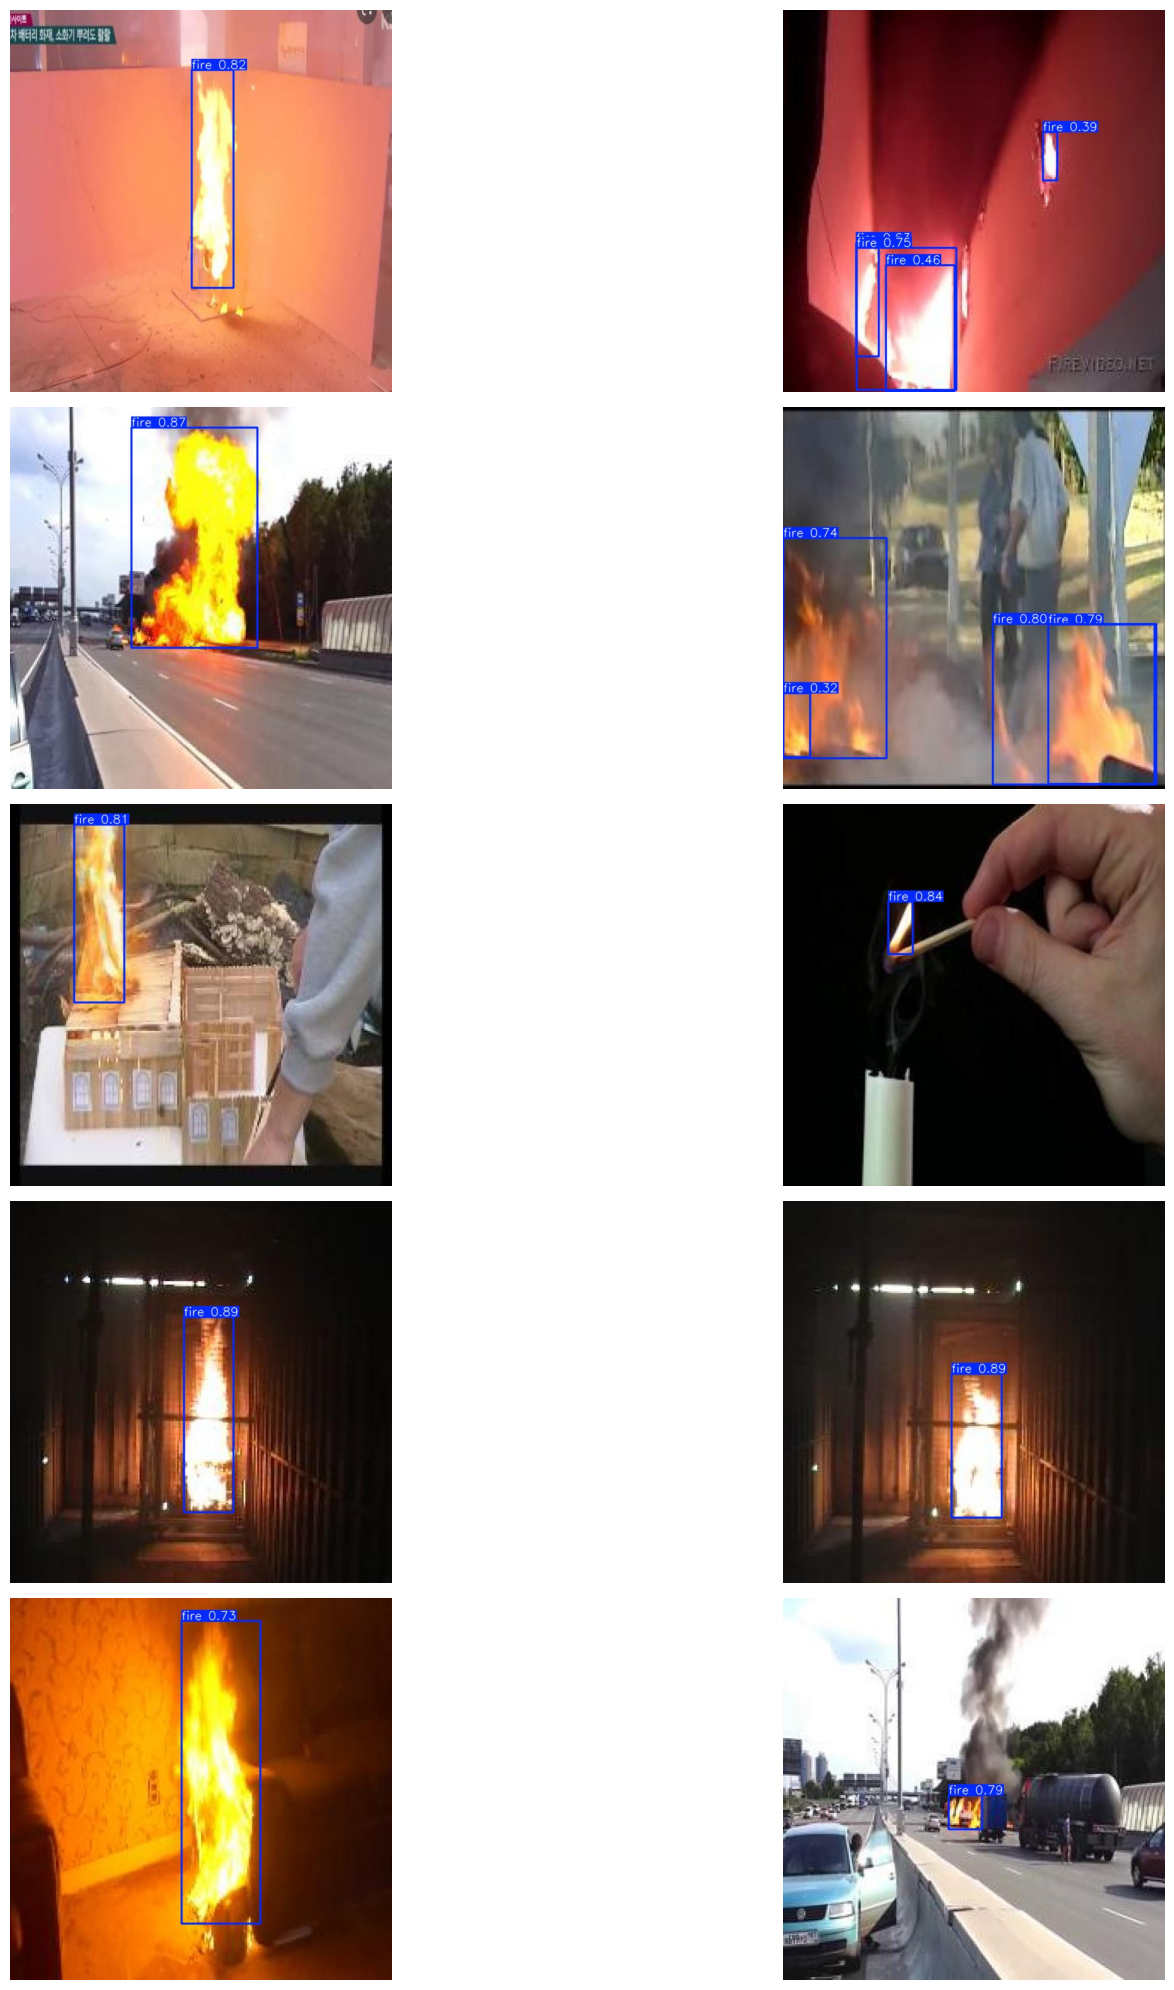

In [11]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Define the path to the images and select 10 random images
image_folder = '/kaggle/working/Fire-detection-1/test/images'
all_images = os.listdir(image_folder)
random_images = random.sample(all_images, 10)

# Run inference on the selected images and save the results
predicted_image_paths = []
for img_name in random_images:
    img_path = os.path.join(image_folder, img_name)

    # Run inference and get the results for this image
    results = model.predict(source=img_path, save=True)

    # results is a list, we access the first element to get the save_dir
    save_dir = results[0].save_dir  # Accessing the first result's save_dir
    predicted_image_path = os.path.join(save_dir, img_name)
    predicted_image_paths.append(predicted_image_path)

# Display all predicted images using matplotlib
plt.figure(figsize=(20, 20))  # Create a large figure for the grid of images

for i, predicted_img in enumerate(predicted_image_paths):
    # Load the predicted image
    image = cv2.imread(predicted_img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Display the image in a grid
    plt.subplot(5, 2, i+1)  # 5 rows, 2 columns grid
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels

# Show the grid of images
plt.tight_layout()
plt.show()

In [ ]:
import os

# Modify this path based on where the file is located

video_path = '/kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4'  # Change 'your-video-file' to match your Kaggle input directory

# Run YOLOv11 inference on the video
model.predict(source=video_path, conf=0.2, save=True)

In [5]:
import torch
from ultralytics import YOLO

# Load the custom YOLOv9 model (using ONNX format in this case)
model = YOLO('/kaggle/input/yolo11fire/best.onnx')  # Path to your custom model

# Run the prediction on the video file with specified confidence and save to the chosen directory
results = model.predict(
    source="/kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4", 
    conf=0.28, 
    save=True
)

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /kaggle/input/yolo11fire/best.onnx for ONNX Runtime inference...


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



2024-10-05 11:49:31.378155616 [W:onnxruntime:, transformer_memcpy.cc:74 ApplyImpl] 4 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.


video 1/1 (frame 1/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 2 fires, 50.1ms
video 1/1 (frame 2/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 2 fires, 44.9ms
video 1/1 (frame 3/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 2 fires, 45.0ms
video 1/1 (frame 4/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 2 fires, 33.8ms
video 1/1 (frame 5/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 2 fires, 29.2ms
video 1/1 (frame 6/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 2 fires, 28.8ms
video 1/1 (frame 7/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 2 fires, 29.0ms
video 1/1 (frame 8/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 2 fires, 29.3ms
video 1/1 (frame 9/3268)

In [10]:
import torch
from ultralytics import YOLO
import cv2
import os

# Load the custom YOLO model (in ONNX format)
model = YOLO('/kaggle/input/yolo11fire/best.onnx')  # Path to your custom model

# Define the threshold for filtering out large bounding boxes
MAX_AREA_THRESHOLD = 0.4  # Maximum area percentage relative to the image size

# Custom function to filter out large bounding boxes
def filter_large_bboxes(result, max_area_threshold):
    filtered_boxes = []
    
    # Get image dimensions (width and height)
    img_width, img_height = result.orig_shape[1], result.orig_shape[0]
    
    # Loop over detected boxes
    for box in result.boxes:
        # Extract bounding box coordinates
        x_min, y_min, x_max, y_max = box.xyxy[0]
        
        # Calculate the width and height of the bounding box
        box_width = x_max - x_min
        box_height = y_max - y_min
        
        # Calculate the area of the bounding box as a percentage of the total image area
        box_area = (box_width * box_height) / (img_width * img_height)
        
        # Filter out boxes that exceed the maximum area threshold
        if box_area <= max_area_threshold:
            filtered_boxes.append(box)
    
    return filtered_boxes

# Create a function to save the filtered video
def save_filtered_video(results, output_video_path, frame_width, frame_height, fps):
    # Initialize the VideoWriter object to save the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    # Process each result (frame)
    for result in results:
        # Copy the original image (frame)
        img = result.orig_img.copy()

        # Filter out large bounding boxes
        result.boxes = filter_large_bboxes(result, MAX_AREA_THRESHOLD)

        # Draw filtered bounding boxes with confidence scores
        for box in result.boxes:
            x_min, y_min, x_max, y_max = box.xyxy[0]
            confidence = box.conf[0]  # Get the confidence score

            # Draw the bounding box (blue color, thickness 2)
            cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)

            # Prepare the label with the confidence score
            label = f"{confidence:.2f}"  # Format the confidence score
            # Draw the label near the bounding box
            cv2.putText(img, label, (int(x_min), int(y_min) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Write the frame with the filtered bounding boxes to the video
        out.write(img)

    # Release the VideoWriter object
    out.release()

# Run the prediction on the video file with specified confidence
results = model.predict(
    source="/kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4", 
    conf=0.12,
    task='obb',
    save=False  # We'll save the video manually
)

# Extract video metadata (width, height, fps) from the first frame
frame_width = int(results[0].orig_shape[1])
frame_height = int(results[0].orig_shape[0])
fps = 30  # Set FPS manually (you can change this based on the original video FPS)

# Specify the output video path
output_video_path = '/kaggle/working/filtered_output_video.mp4'

# Save the filtered video with bounding boxes
save_filtered_video(results, output_video_path, frame_width, frame_height, fps)

# Check the output video file
print("Filtered video saved at:", output_video_path)
os.listdir('/kaggle/working')

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /kaggle/input/yolo11fire/best.onnx for ONNX Runtime inference...


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



2024-10-05 12:11:52.939796048 [W:onnxruntime:, transformer_memcpy.cc:74 ApplyImpl] 4 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.


video 1/1 (frame 1/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 3 fires, 44.9ms
video 1/1 (frame 2/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 3 fires, 45.0ms
video 1/1 (frame 3/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 3 fires, 44.9ms
video 1/1 (frame 4/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 3 fires, 43.9ms
video 1/1 (frame 5/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 3 fires, 28.8ms
video 1/1 (frame 6/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 3 fires, 29.5ms
video 1/1 (frame 7/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 3 fires, 29.6ms
video 1/1 (frame 8/3268) /kaggle/input/fire11/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4: 640x640 3 fires, 28.6ms
video 1/1 (frame 9/3268)

['filtered_output_video.mp4', 'output_video.mp4', 'runs', '.virtual_documents']

In [ ]:
# Use higher img_size and limit the number of detections per frame
model.predict(source="/content/WhatsApp Video 2024-09-26 at 00.49.17_f5294ac2.mp4", max_det=100, save=True)

# CNN

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Set paths for train and valid datasets
train_image_folder = '/content/FireandSmokeDetection-2/train/images'
train_label_folder = '/content/FireandSmokeDetection-2/train/labels'
valid_image_folder = '/content/FireandSmokeDetection-2/valid/images'
valid_label_folder = '/content/FireandSmokeDetection-2/valid/labels'

# Image size and initialize lists
image_size = (128, 128)
X = []
y = []

In [ ]:
# Function to load images and labels
def load_images_and_labels(image_folder, label_folder):
    images = os.listdir(image_folder)
    X_local = []
    y_local = []

    for img_name in images:
        img_path = os.path.join(image_folder, img_name)

        # Load and preprocess the image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, image_size)
        image = image / 255.0
        X_local.append(image)

        # Process the label file (same name as image, but with .txt)
        label_name = img_name.replace('.jpg', '.txt').replace('.png', '.txt')
        label_path = os.path.join(label_folder, label_name)

        with open(label_path, 'r') as f:
            label_data = f.readline().strip().split()
            label = int(label_data[0])  # The first value is the class (0 or 1)
            y_local.append(label)

    return np.array(X_local), np.array(y_local)

In [ ]:
# Load train and validation datasets
X_train, y_train = load_images_and_labels(train_image_folder, train_label_folder)
X_valid, y_valid = load_images_and_labels(valid_image_folder, valid_label_folder)

# Convert labels to categorical (if needed)
y_train = to_categorical(y_train, num_classes=1)  # Adjust if only 2 classes
y_valid = to_categorical(y_valid, num_classes=1)

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Build a CNN model with Input layer
model = Sequential([
    Input(shape=(128, 128, 3)),  # Define the input shape explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Adjust for binary classification
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
batch_size = 32
epochs = 50

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    epochs=epochs
)

Epoch 1/50


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 297ms/step - accuracy: 0.8756 - loss: 0.1074 - val_accuracy: 1.0000 - val_loss: 0.0000e+00

Epoch 2/50

34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00

Epoch 3/50

34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00

Epoch 4/50

34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00

Epoch 5/50

34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00

Epoch 6/50

34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00

Epoch 7/50

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00

Epoch 8/50

34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/st

In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00

Validation accuracy: 1.0000


In [ ]:
# Save the model
model.save('fire_detection_cnn.keras')

In [ ]:
# Run inference on a new image
def predict_fire(image_path, model):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, image_size)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)

    return predicted_class

In [ ]:
# Test on a random image
random_image = random.choice(os.listdir(valid_image_folder))
predicted_class = predict_fire(os.path.join(valid_image_folder, random_image), model)

if predicted_class == 1:
    print("Fire detected in the image.")
else:
    print("No fire detected in the image.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step

No fire detected in the image.


In [ ]:
# Visualize some of the test images
def plot_images_with_predictions(image_paths, model):
    plt.figure(figsize=(20, 20))  # Create a large figure for the grid of images
    for i, img_name in enumerate(image_paths):
        img_path = os.path.join(valid_image_folder, img_name)
        predicted_class = predict_fire(img_path, model)

        # Load the image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image in a grid
        plt.subplot(5, 2, i+1)  # 5 rows, 2 columns grid
        plt.imshow(image)
        plt.title(f"Predicted: {'Fire' if predicted_class == 0 else 'No Fire'}")
        plt.axis('off')  # Turn off axis labels

    # Show the grid of images
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


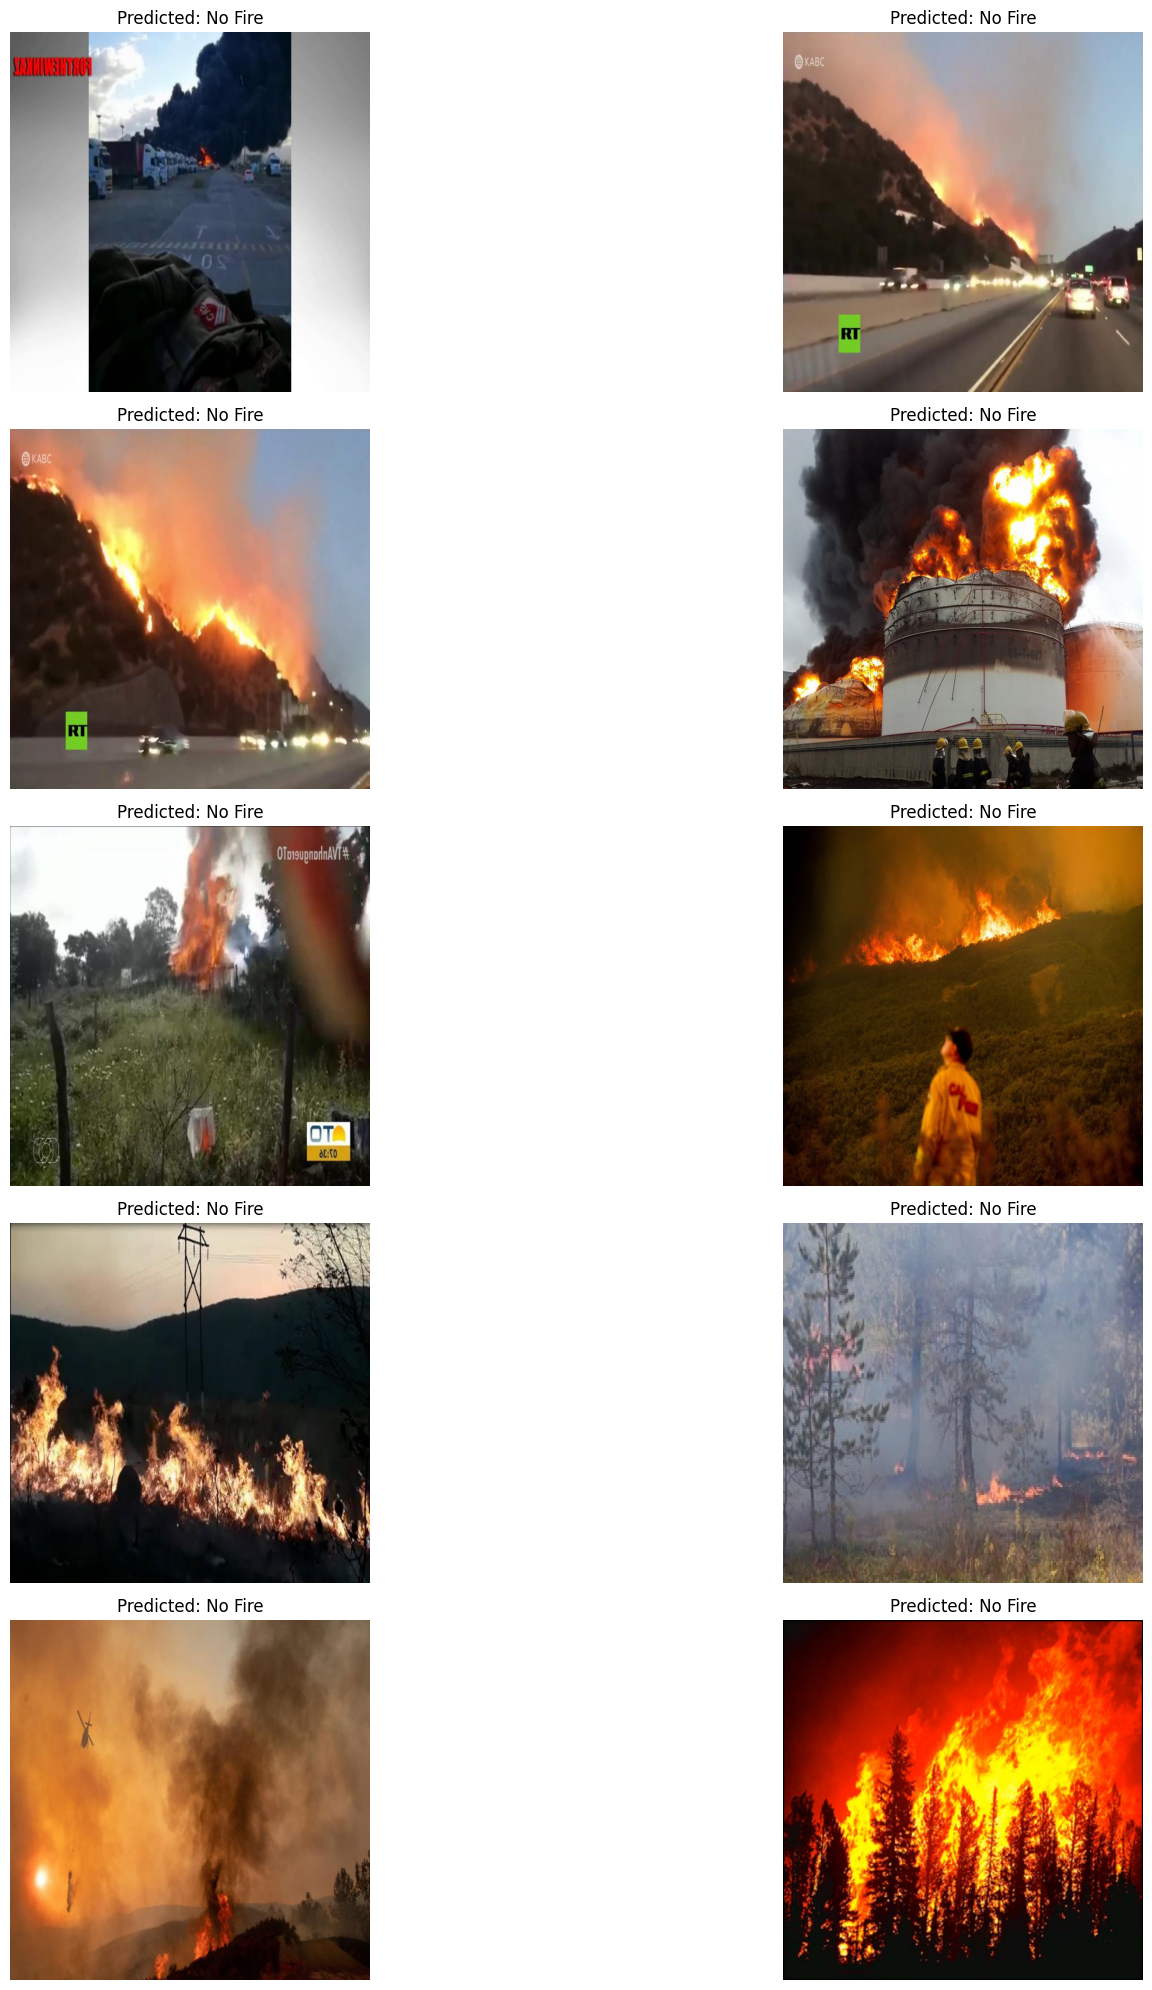

In [ ]:
# Select 10 random images for visualization
random_images = random.sample(os.listdir(valid_image_folder), 10)
plot_images_with_predictions(random_images, model)